In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=2, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

### 1. 역행렬

- $2 \times 2$ 행렬의 역행렬을 구하는 공식은 다음과 같습니다.

$$
\begin{bmatrix} a&b \\ c&d \end{bmatrix}^{-1} = \frac{1}{ad-bc} \begin{bmatrix} d & -b \\ -c &a \end{bmatrix}
$$

- 위 공식을 이용하여 다음 행렬의 역행렬을 구하고 `numpy.linalg.inv()`를 이용하여 구한 결과와 비교하세요.

$$
\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
$$

$$
\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}^{-1} = \frac{1}{1 \cdot 4 - 2 \cdot 3} \begin{bmatrix} 4 & -2 \\ -3 & 1 \end{bmatrix} = - \frac{1}{2} \begin{bmatrix} 4 & -2 \\ -3 & 1 \end{bmatrix} =\begin{bmatrix} -2 & 1 \\ 3/2 & -1/2 \end{bmatrix}
$$

In [3]:
A =  np.array([1, 2, 3, 4]).reshape(2,2)

print(np.linalg.inv(A))

[[-2.   1. ]
 [ 1.5 -0.5]]


### 2. 행렬-벡터 연산 

- 슬라이드의 예제(2), (3)에 대해서 연산 방식과 노트북 파일의 코드를 읽고 이해하세요.


- 예제 (2)

$$
\mathbf{S} = \sum_{i=1}^{m} \mathbf{x}^{(i)} \left(\mathbf{x}^{(i)} \right)^{\text{T}}
$$


-  예제 (3)

$$
w^{(t+1)}_j = \sum_{i=1}^{m} \left\{ \left(\mathbf{X}_{(i,:)}\cdot\mathbf{w}^{(t)}-y_i\right) X_{ij}\right\}
$$

#### 해답: 슬라이드 참조

### 3. 경사도의 수치미분

- optimum.xls - gradient descent 1D 시트에는 1차원 경사하강법의 데모가 들어 있습니다.

- 이 시트에는 경사도(1계 미분, 1st order derivative)를 직접 미분하여 구현해 두었습니다. 

- 함수를 미분할 정도로 목적함수가 정식화 되어 있지 않은 경우를 가정하고 H열을 수치미분에 의한 미분계수로 바꿔서 경사하강 데모를 만들어 보세요.

- 해답은 numerical gradient 1D 시트에 있습니다.

### 4. 최적화

- 수업중에 만든 최적화 함수를 노트북에 로딩하여 1, 2, 3번 함수에 대해 다음 실험을 해보세요.
    
    - 선탐색을 하는 경우 `line_search = True`와 하지 않는 경우 `line_search = False`를 각각 실행하고 탐색 경로를 비교한다.
    
    - 주석을 참고하여 실험을 위한 매개변수 세팅을 바꿔 가면서 성공적인 탐색을 하는지 확인한다.
    

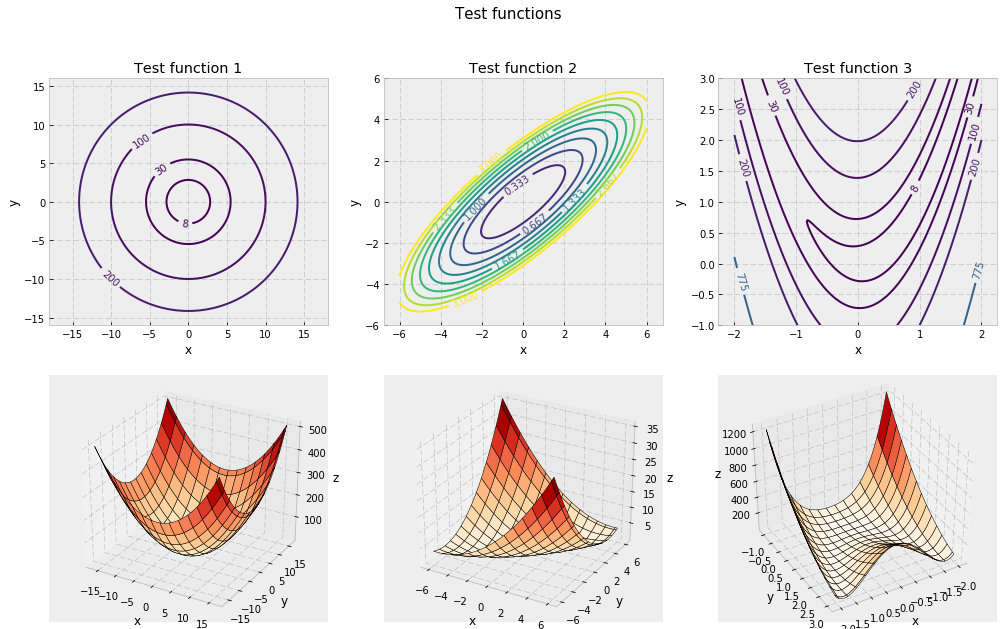

In [26]:
# 핵심함수를 따로 정의한 노트북 파일을 로드한다.
%run ./minimize.ipynb

# 테스트에 쓸 함수를 따로 정의한 노트북 파일을 로드한다.
%run ./testfuncs.ipynb

################################################################
# START OPTIMIZATION
################################################################
INIT POINT : [-2.  3.], dtype : float64
METHOD     : Steepest Descent
##############
# START ITER.
##############
Iter:    1, |c|:  7.2111026, alpha:0.1000000, Cost:  8.3200000, d:[ 4. -6.], x:[-1.6  2.4]
Stop criterion break
Iter:   83, |c|:  0.0000001, alpha:0.1000000, Cost:  0.0000000, d:[ 5.65e-08 -8.48e-08], x:[-2.26e-08  3.39e-08]


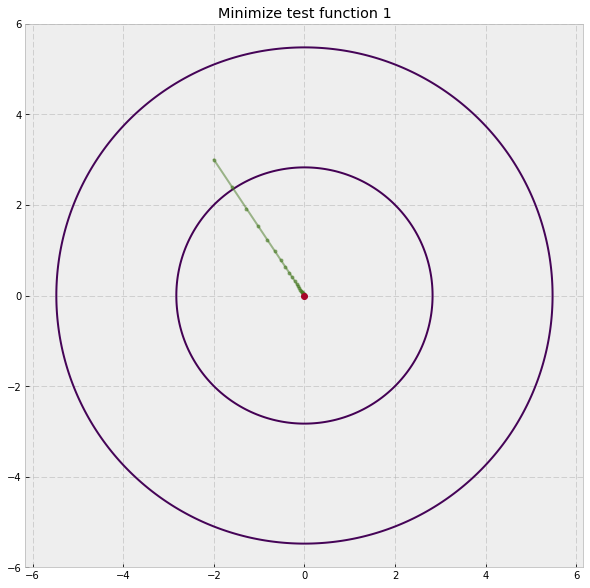

In [42]:
# 반복 히스토리를 저장할 전역변수와 콜백함수
my_Xk = []
def record_hist2(xk) :
    global my_Xk
    my_Xk.append(xk)

# 선탐색을 할지 안할지를 결정할 변수, True:선탐색 함, False:선탐색하지 않음
line_search = False

# 탐색방법을 선택 SDM, CGFR, CGPR
method = 'SDM'

# 테스트에 사용할 함수와 초기값 최적해를 설정한다.
i = 0 # 이 번호를 바꿔서 2번함수 3번 함수를 지정한다.
# testfuncs.ipynb 파일에 의해 로딩된 전역변수에서 값을 가지고 온다.
f = F[i]
x0 =  np.array([-2.,3.])
x_optim = OPTIMS[i]

x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
X, Y = np.meshgrid(x, y)

if i == 1 :
    Z = f([X, Y], -0.7)
    args=(-0.7,)
    x0 =  np.array([-2.,-3.])
else :
    Z = f([X, Y]) 
    args = ()
    
if not line_search :
    x_star = minimize(f, x0, args=args,
                      method=method,           # SDM, CGPR 에 대해 각각 실험 해보세요.
                      lineargs={'lr':0.1},    # 'lr' 파라미터의 값을 바꿔가면서 실험 해보세요.
                      strict=False,           # 선탐색을 하지 않을 때 strict 옵션을 True?, False?
                      linesrch=None,          
                      verbose_step=500, 
                      max_iter=5000,
                      callback=record_hist2)
else :
    x_star = minimize(f, x0, args=args,
                      method=method,              # SDM, CGPR 에 대해 각각 실험 해보세요.
                      lineargs={'delta':1.0e-3}, # 황금분할 탐색을 시작할 때 초기 스탭사이즈를 결정
                      verbose_step=500, 
                      max_iter=5000,
                      callback=record_hist2)

my_Xk = np.r_['0,2,1', x0, np.asarray(my_Xk)]

plt.rcParams["figure.figsize"] = (10,10)

plt.contour(X, Y, Z,levels=LEVELS[i])
plt.plot(my_Xk[:,0], my_Xk[:,1], '.-', color=style_colors[3], alpha=0.5)
plt.plot(x_optim[0], x_optim[1] , 'o', color=style_colors[1])
plt.title('Minimize test function {}'.format(i+1))
plt.axis('equal')
plt.show()

In [1]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item)
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }           
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #FF0000; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>